In [1]:
from pystock.utils import Stock

In [2]:
ticker = "APPL"
directory = "Data/AAPL.csv"

apple = Stock(ticker, directory)

In [3]:
apple.ticker

'APPL'

In [5]:
data = apple.load_data()

In [10]:
apple.change_frequency("W")

In [12]:
apple.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [1]:
from pystock.utils import Stocker

In [2]:
benchmark_dir = "Data/GSPC.csv"
benchmark_name = "GSPC"

stock_dirs = ["Data/AAPL.csv", "Data/MSFT.csv"]
stock_names = ["AAPL", "MSFT"]

st = Stocker(benchmark_dir, benchmark_name, stock_dirs, stock_names)

In [3]:
st.load_benchmark()

In [4]:
st.benchmark.loaded

True

In [5]:
st.benchmark.data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.66,17.66,17.66,17.66,17.66,0
1927-12-31,17.66,17.66,17.66,17.66,17.66,0
1928-01-01,17.66,17.66,17.66,17.66,17.66,0
1928-01-02,17.66,17.66,17.66,17.66,17.66,0
1928-01-03,17.76,17.76,17.76,17.76,17.76,0


In [6]:
st.load_all()

In [7]:
st.stocks, st.stock_names

([<pystock.utils.Stock at 0x7f8a39e863d0>,
 ['AAPL', 'MSFT'])

In [4]:
st.benchmark

AttributeError: 'Stocker' object has no attribute 'benchmark'

In [6]:
st.add_stocks(stock_dirs, stock_names, load_data=False)

In [7]:
st.stocks

In [8]:
st.stocks[0].data

AttributeError: 'Stock' object has no attribute 'data'

In [9]:
st.load_all()

In [10]:
st.stocks

In [11]:
st.stocks[0].name

'AAPL'

In [12]:
st.add_stocks(["Data/GOOG.csv"], )

In [13]:
st.stocks[2].loaded


True

In [14]:
st.stocks[-1].name

'df3'

In [16]:
st.change_benchmark_frequency("W")

In [19]:
st.stocks[-1].name

'df3'

In [15]:
st.benchmark.name

'GSPC'

In [16]:
st.remove_stocks(["df3"])

In [17]:
st.stock_dirs

['Data/AAPL.csv', 'Data/MSFT.csv']

In [18]:
st.stocks[-1].name

'MSFT'

In [19]:
A = ["1", "2", "3", "4"]

In [30]:
A.pop(3)

'4'

In [31]:
A

['1', '2', '3']

In [8]:
st.change_benchmark("Data/DJI.csv", "DJI", True, False)

In [9]:
st.benchmark.loaded

True

In [10]:
st.benchmark.load_data()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-01-02,809.200012,809.200012,809.200012,809.200012,809.200012,0
1970-01-03,809.200012,809.200012,809.200012,809.200012,809.200012,0
1970-01-04,809.200012,809.200012,809.200012,809.200012,809.200012,0
1970-01-05,811.309998,811.309998,811.309998,811.309998,811.309998,0
1970-01-06,803.659973,803.659973,803.659973,803.659973,803.659973,0
...,...,...,...,...,...,...
2022-02-26,34058.800781,34058.800781,34058.800781,34058.800781,34058.800781,0
2022-02-27,34058.800781,34058.800781,34058.800781,34058.800781,34058.800781,0
2022-02-28,33892.601562,33892.601562,33892.601562,33892.601562,33892.601562,0


In [9]:
st.benchmark.loaded

True

## A Simple Use

In [1]:
from pystock.stocks import Stocker
from scipy.stats import linregress
import pandas as pd

In [2]:
benchmark_dir = "Data/GSPC.csv"
benchmark_name = "S&P"

stock_dirs = ["Data/AAPL.csv", "Data/MSFT.csv"]
stock_names = ["AAPL", "MSFT"]

st = Stocker(benchmark_dir, benchmark_name, stock_dirs, stock_names)

st.load_benchmark(columns=["Adj Close"], rename_cols=["Close"])
st.load_all(columns=["Adj Close"], rename_cols=["Close"])

In [3]:
st.stock_names, st.stocks

(['AAPL', 'MSFT'],
  <pystock.stocks.Stock at 0x7f3621823a60>])

In [4]:
st.stocks[0].loaded

True

In [5]:
for stock, name in st:
    print(name, stock.data.head())

S&P             Close
Date             
1927-12-30  17.66
1927-12-31  17.66
1928-01-01  17.66
1928-01-02  17.66
1928-01-03  17.76
AAPL                Close
Date                
1980-12-12  0.099874
1980-12-13  0.099874
1980-12-14  0.099874
1980-12-15  0.094663
1980-12-16  0.087715
MSFT                Close
Date                
1986-03-13  0.060809
1986-03-14  0.062980
1986-03-15  0.062980
1986-03-16  0.062980
1986-03-17  0.064067


In [6]:
st.stock_names

['AAPL', 'MSFT']

In [7]:
_, _ = st.all_stocks()

In [8]:
st.stock_names

['AAPL', 'MSFT']

In [9]:
df = st.merge_stock_with_benchmark("AAPL")

In [10]:
df

,AAPL_Close,S&P_Close
Date,,
1980-12-12,0.099874,129.229996
1980-12-13,0.099874,129.229996
1980-12-14,0.099874,129.229996
1980-12-15,0.094663,129.449997
1980-12-16,0.087715,130.600006
...,...,...
2022-12-25,131.860001,3844.820068
2022-12-26,131.860001,3844.820068
2022-12-27,130.029999,3829.250000


In [11]:
st.stock_names

['AAPL', 'MSFT']

In [12]:
dfs = st.merge_all()
dfs

,S&P_Close,AAPL_Close,MSFT_Close
Date,,,
1986-03-13,233.190002,0.085978,0.060809
1986-03-14,236.550003,0.090755,0.062980
1986-03-15,236.550003,0.090755,0.062980
1986-03-16,236.550003,0.090755,0.062980
1986-03-17,234.669998,0.090321,0.064067
...,...,...,...
2022-12-25,3844.820068,131.860001,238.729996
2022-12-26,3844.820068,131.860001,238.729996
2022-12-27,3829.250000,130.029999,236.960007


In [13]:
st.stock_names

['AAPL', 'MSFT']

In [14]:
st.remove_stocks(["AAPL"])

In [15]:
st.stock_names, st.stocks

(['MSFT'], [<pystock.stocks.Stock at 0x7ff4626f5a00>])

In [16]:
print(st)

Stocker object with benchmark S&P and stocks ['MSFT']


In [17]:
st.stocks[0].columns

Index(['Close'], dtype='object')

In [10]:
print(st)

Stocker object with benchmark S&P and stocks ['AAPL', 'MSFT']


In [5]:
st.stocks[0].data

,Close
Date,
1980-12-12,0.099874
1980-12-13,0.099874
1980-12-14,0.099874
1980-12-15,0.094663
1980-12-16,0.087715
...,...
2022-12-25,131.860001
2022-12-26,131.860001
2022-12-27,130.029999


In [6]:
st.benchmark.data

,Close
Date,
1927-12-30,17.660000
1927-12-31,17.660000
1928-01-01,17.660000
1928-01-02,17.660000
1928-01-03,17.760000
...,...
2022-12-25,3844.820068
2022-12-26,3844.820068
2022-12-27,3829.250000


In [12]:
st.change_benchmark_frequency("M")

In [13]:
df = st.merge_stock_with_benchmark("MSFT")
df

,S&P_Close,MSFT_Close
Date,,
1986-03-31,238.899994,0.059723
1986-04-30,235.520004,0.070038
1986-05-31,247.350006,0.076011
1986-06-30,250.839996,0.066781
1986-07-31,236.119995,0.061894
...,...,...
2022-07-31,4130.290039,279.358093
2022-08-31,3955.000000,260.735199
2022-09-30,3585.620117,232.245483


In [14]:
df = df.pct_change().dropna()

In [9]:
linreg = linregress(df)

In [10]:
linreg

LinregressResult(slope=1.2400993408869867, intercept=0.01429180588702948, rvalue=0.5743846151449493, pvalue=5.518691624707317e-40, stderr=0.08444631447910436, intercept_stderr=0.0037944122207952883)

In [32]:
linreg = linregress(df[["GSPC_Close", "MSFT_Close"]])

In [33]:
linreg

LinregressResult(slope=1.2400993408869867, intercept=0.01429180588702948, rvalue=0.5743846151449493, pvalue=5.518691624707317e-40, stderr=0.08444631447910436, intercept_stderr=0.0037944122207952883)

In [22]:
df.iloc[:, 0]

Date
1986-04-30   -0.014148
1986-05-31    0.050229
1986-06-30    0.014110
1986-07-31   -0.058683
1986-08-31    0.071193
                ...   
2022-07-31    0.091116
2022-08-31   -0.042440
2022-09-30   -0.093396
2022-10-31    0.079863
2022-11-30    0.053753
Freq: M, Name: S&P_Close, Length: 440, dtype: float64

In [23]:
#Calculate beta
variance = df["S&P_Close"].var()
covariance = df["S&P_Close"].cov(df["MSFT_Close"])
beta = covariance / variance
print(beta)

1.2400993408869865


In [16]:
# calulate alpha
alpha = df["MSFT_Close"].mean() - beta * df["S&P_Close"].mean()
print(alpha)

0.014291805887029482


In [1]:
from pystock.portfolio import Portfolio
from scipy.stats import linregress
import pandas as pd
import numpy as np

In [22]:
benchmark_dir = "Data/GSPC.csv"
benchmark_name = "S&P"

stock_dirs = ["Data/AAPL.csv", "Data/MSFT.csv", "Data/GOOG.csv"]
stock_names = ["AAPL", "MSFT", "GOOG"]

st = Portfolio(benchmark_dir, benchmark_name, stock_dirs, stock_names)
start_date = "2010-01-01"
end_date = "2022-12-20"
st.load_benchmark(columns=["Adj Close"], rename_cols=["Close"], start_date=start_date, end_date=end_date)
st.load_all(columns=["Adj Close"], rename_cols=["Close"], start_date=start_date, end_date=end_date)

In [23]:
st.stocks

[Stock(name=AAPL), Stock(name=MSFT), Stock(name=GOOG)]

In [24]:
st.__dict__

{'benchmark_dir': 'Data/GSPC.csv',
 'stock_dirs': ['Data/AAPL.csv', 'Data/MSFT.csv', 'Data/GOOG.csv'],
 'benchmark_name': 'S&P',
 'stock_names': ['AAPL', 'MSFT', 'GOOG'],
 'benchmark': Stock(name=S&P),
 'stocks': [Stock(name=AAPL), Stock(name=MSFT), Stock(name=GOOG)],
 'weights': array([0.33333333, 0.33333333, 0.33333333])}

In [25]:
st.portfolio_summary(frequency="M")

Portfolio Summary
*****************

Portfolio with benchmark S&P and stocks ['AAPL', 'MSFT', 'GOOG']
Here are the summary of stocks in the portfolio
+----+---------+-----------------------+----------------------+------------+----------+----------+
|    | Stock   |   Monthly_Mean_Return |   Monthly_Return_STD |      Alpha |     Beta |   Weight |
|----+---------+-----------------------+----------------------+------------+----------+----------|
|  0 | AAPL    |             0.0242799 |            0.0792501 | 0.01341    | 1.13097  | 0.333333 |
|  1 | MSFT    |             0.0180933 |            0.062661  | 0.00854988 | 0.992962 | 0.333333 |
|  2 | GOOG    |             0.0157012 |            0.0697715 | 0.00549984 | 1.06141  | 0.333333 |
+----+---------+-----------------------+----------------------+------------+----------+----------+
Portfolio Return: 0.019358154311500557
Portfolio Volatility: 0.15336324956468325


In [17]:
st.change_benchmark_frequency("M")

In [18]:
st["AAPL"].frequency

'M'

In [19]:
st.stocks

[Stock(name=AAPL), Stock(name=MSFT)]

In [20]:
st.stocks[0].data

,Close
Date,
2010-01-31,5.846978
2010-02-28,6.229348
2010-03-31,7.154222
2010-04-30,7.948493
2010-05-31,7.820327
...,...
2022-07-31,162.015808
2022-08-31,156.959625
2022-09-30,137.971115


In [26]:
st.cov_matrix()

,AAPL,MSFT,GOOG
AAPL,0.006281,0.002502,0.002310
MSFT,0.002502,0.003926,0.002489
GOOG,0.002310,0.002489,0.004868


In [10]:
st.__dict__.keys()

dict_keys(['benchmark_dir', 'stock_dirs', 'benchmark_name', 'stock_names', 'benchmark', 'stocks', 'weights', 'betas', 'alphas'])

In [11]:
st.betas

[1.9900448937502961, 1.7596865020163301]

In [9]:
st.benchmark_return(frequency="M")

0.011243579635068505

In [6]:
st["AAPL"].return_

{}

In [17]:
st["AAPL"].data

,Close
Date,
2010-12-31,9.819854
2011-01-31,9.819854
2011-02-28,9.819854
2011-03-31,9.819854
2011-04-30,9.819854
...,...
2021-08-31,131.116013
2021-09-30,131.116013
2021-10-31,131.116013


In [7]:
st["AAPL"].freq_return()

0.0007469010813196343

In [22]:
st["AAPL"].freq_return("M")

0.0227322239640602

In [23]:
st["MSFT"].freq_return("M")

0.023555606856493567

In [9]:
st["AAPL"].return_

{'D': 0.0007469010813196343, 'M': 0.0227322239640602}

In [10]:
st.stocks[0].__dict__

{'name': 'AAPL',
 'directory': 'Data/AAPL.csv',
 'loaded': True,
 'return_': {'D': 0.0007469010813196343, 'M': 0.0227322239640602},
 'data':                  Close
 Date                  
 1980-12-31    0.118546
 1981-01-31    0.098137
 1981-02-28    0.092058
 1981-03-31    0.085110
 1981-04-30    0.098571
 ...                ...
 2022-07-31  162.015808
 2022-08-31  156.959625
 2022-09-30  137.971115
 2022-10-31  153.086044
 2022-11-30  148.029999
 
 [504 rows x 1 columns],
 'columns': Index(['Close'], dtype='object'),
 'start_date': Timestamp('1980-12-12 00:00:00'),
 'end_date': Timestamp('2022-12-29 00:00:00'),
 'frequency': 'M',
 'alpha': 1.3678233681089669,
 'beta': 0.01211733410736792}

In [11]:
apple = st["AAPL"]
apple in st

True

In [12]:
st["AAPL"]==st.stocks[0]

True

In [13]:
st.add_stocks(["Data/AAPL.csv"], ["AAPL"])

Stock AAPL already exists
You have not specified overwrite=True. Skipping...


In [14]:
st.stocks

[Stock(name=AAPL), Stock(name=MSFT)]

In [ ]:
st.add_stocks(["Data/AAPL.csv"], ["AAPL"])

In [15]:
st.stocks[0] == st.stocks[-1]

True

In [17]:
apple = st["AAPL"]

apple in st.stocks

True

In [2]:
from pystock.capm import CAPM

In [3]:
benchmark_dir = "Data/GSPC.csv"
benchmark_name = "S&P"

stock_dirs = ["Data/AAPL.csv", "Data/MSFT.csv"]
stock_names = ["AAPL", "MSFT"]

camp = CAPM()

In [4]:
portfolio = camp.create_portfolio("P1",benchmark_dir, benchmark_name, stock_dirs, stock_names)

In [5]:
portfolio.stocks[0].__dict__

{'name': 'AAPL',
 'directory': 'Data/AAPL.csv',
 'loaded': True,
 'return_': {},
 'data':                  Close
 Date                  
 1980-12-31    0.118546
 1981-01-31    0.098137
 1981-02-28    0.092058
 1981-03-31    0.085110
 1981-04-30    0.098571
 ...                ...
 2022-07-31  162.015808
 2022-08-31  156.959625
 2022-09-30  137.971115
 2022-10-31  153.086044
 2022-11-30  148.029999
 
 [504 rows x 1 columns],
 'columns': Index(['Close'], dtype='object'),
 'start_date': Timestamp('1980-12-12 00:00:00'),
 'end_date': Timestamp('2022-12-29 00:00:00'),
 'frequency': 'M'}

In [6]:
portfolio.__dict__

{'name': 'P1',
 'benchmark_dir': 'Data/GSPC.csv',
 'stock_dirs': ['Data/AAPL.csv', 'Data/MSFT.csv'],
 'benchmark_name': 'S&P',
 'stock_names': ['AAPL', 'MSFT'],
 'benchmark': Stock(name=S&P),
 'stocks': [Stock(name=AAPL), Stock(name=MSFT)],
 'weights': None}

In [7]:
portfolio.set_weight(weights="equal")

In [8]:
portfolio.__dict__

{'name': 'P1',
 'benchmark_dir': 'Data/GSPC.csv',
 'stock_dirs': ['Data/AAPL.csv', 'Data/MSFT.csv'],
 'benchmark_name': 'S&P',
 'stock_names': ['AAPL', 'MSFT'],
 'benchmark': Stock(name=S&P),
 'stocks': [Stock(name=AAPL), Stock(name=MSFT)],
 'weights': array([0.5, 0.5])}

In [9]:
camp.__dict__

{'frequency': 'M',
 'portfolios': {'P1': <pystock.portfolio.Portfolio at 0x7fda31348c70>}}

In [10]:
portfolio.get_all_stock_params()

,Stock,Alpha,Beta
0,AAPL,0.012117,1.367823
1,MSFT,0.014292,1.240099


In [11]:
beta = camp.portfolio_beta("P1")

In [12]:
beta

1.3039613544979767

In [21]:
st["AAPL"].data

,Close
Date,
2010-01-04,6.515212
2010-01-05,6.526478
2010-01-06,6.422666
2010-01-07,6.410790
2010-01-08,6.453411
...,...
2022-12-16,134.509995
2022-12-17,134.509995
2022-12-18,134.509995


In [34]:
df1 = st["AAPL"].data.values[:,0]
df2 = st["MSFT"].data.values[:,0]

In [35]:
df1.shape, df2.shape

((155,), (155,))

In [38]:
df = pd.DataFrame({"AAPL": df1, "MSFT": df2})

In [41]:
df.cov()

,AAPL,MSFT
AAPL,2291.903434,4228.002071
MSFT,4228.002071,8031.007461


In [42]:
df

,AAPL,MSFT
0,5.846978,21.563446
1,6.229348,22.040998
2,7.154222,22.517639
3,7.948493,23.478615
4,7.820327,19.924089
...,...,...
150,162.015808,279.358093
151,156.959625,260.735199
152,137.971115,232.245483
153,153.086044,231.477661


<AxesSubplot: >

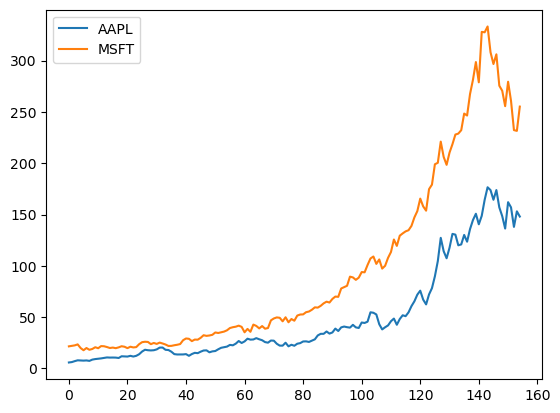

In [43]:
df.plot()

In [1]:
from pystock.portfolio import Portfolio
from scipy.stats import linregress
import pandas as pd
import numpy as np
from pystock.models import Model

In [2]:
benchmark_dir = "Data/GSPC.csv"
benchmark_name = "S&P"

stock_dirs = ["Data/AAPL.csv", "Data/MSFT.csv", "Data/GOOG.csv"]
stock_names = ["AAPL", "MSFT", "GOOG"]

st = Portfolio(benchmark_dir, benchmark_name, stock_dirs, stock_names)
start_date = "2010-01-01"
end_date = "2022-12-20"
st.load_benchmark(columns=["Adj Close"], rename_cols=["Close"], start_date=start_date, end_date=end_date)
st.load_all(columns=["Adj Close"], rename_cols=["Close"], start_date=start_date, end_date=end_date)

In [3]:
model = Model("M")

In [4]:
model.add_portfolio(st, weights="equal")

Adding portfolio...
Portfolio Summary
*****************

Portfolio with benchmark S&P and stocks ['AAPL', 'MSFT', 'GOOG']
Here are the summary of stocks in the portfolio
+----+---------+-----------------------+----------------------+------------+----------+----------+
|    | Stock   |   Monthly_Mean_Return |   Monthly_Return_STD |      Alpha |     Beta |   Weight |
|----+---------+-----------------------+----------------------+------------+----------+----------|
|  0 | AAPL    |             0.0242799 |            0.0792501 | 0.01341    | 1.13097  | 0.333333 |
|  1 | MSFT    |             0.0180933 |            0.062661  | 0.00854988 | 0.992962 | 0.333333 |
|  2 | GOOG    |             0.0157012 |            0.0697715 | 0.00549984 | 1.06141  | 0.333333 |
+----+---------+-----------------------+----------------------+------------+----------+----------+
The covariance matrix is as follows
+------+------------+------------+------------+
|      |       AAPL |       MSFT |       GOOG |
|----

In [5]:
model.market_return

0.9611114314107754

In [6]:
weights =np.array([0.1, 0.1, 0.8])

In [7]:
model.portfolio_info(weights=weights)

(0.9997351618893363, 0.4173596248136806, 0.6460337644532835)

In [8]:
model.portfolio_info()

(0.9998972936681633, 0.3393487122082611, 0.5825364471071841)

In [7]:
model.portfolio["AAPL"].expected_return

1.0433331531384593

In [8]:
model.portfolio["GOOG"].expected_return

0.9996656768412675

In [9]:
model.portfolio["MSFT"].expected_return

0.9566930510247631

In [9]:
model.portfolio.betas

[1.1309725872557297, 0.9929618755424193, 1.0614138109446056]

In [8]:
model.market_return

0.9611114314107754

In [9]:
model.__risk_free_rate__

0.3333333333333333

In [1]:
from pystock.portfolio import Portfolio
from scipy.stats import linregress
import pandas as pd
import numpy as np
from pystock.models import Model

In [2]:
benchmark_dir = "Data/GSPC.csv"
benchmark_name = "S&P"

stock_dirs = ["Data/AAPL.csv", "Data/MSFT.csv", "Data/GOOG.csv"]
stock_names = ["AAPL", "MSFT", "GOOG"]

# st = Portfolio(benchmark_dir, benchmark_name, stock_dirs, stock_names)
start_date = "2010-01-01"
end_date = "2022-12-20"
model = Model("M")

In [3]:
model.create_portfolio(benchmark_dir, benchmark_name, stock_dirs, stock_names, start_date=start_date, end_date=end_date)

Loading benchmark...
Loading stocks...
Calculating other results...
Portfolio Summary
*****************

Portfolio with benchmark S&P and stocks ['AAPL', 'MSFT', 'GOOG']
Here are the summary of stocks in the portfolio
+----+---------+-----------------------+----------------------+------------+----------+----------+
|    | Stock   |   Monthly_Mean_Return |   Monthly_Return_STD |      Alpha |     Beta |   Weight |
|----+---------+-----------------------+----------------------+------------+----------+----------|
|  0 | AAPL    |             0.0242799 |            0.0792501 | 0.01341    | 1.13097  | 0.333333 |
|  1 | MSFT    |             0.0180933 |            0.062661  | 0.00854988 | 0.992962 | 0.333333 |
|  2 | GOOG    |             0.0157012 |            0.0697715 | 0.00549984 | 1.06141  | 0.333333 |
+----+---------+-----------------------+----------------------+------------+----------+----------+
The covariance matrix is as follows
+------+------------+------------+------------+
|    

In [4]:
model.portfolio_info()

(0.9998972936681633, 0.32975497491664535, 0.5742429580906024)